In [33]:
%pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df_unencoded = pd.read_csv('all_fields_populated.csv')
df_unencoded = df_unencoded.dropna()
df = pd.read_csv('all_fields_populated.csv')
df = df.dropna()

label_encoders = {}
for column in ['Building Type', 'Building Function', 'Sex', 'Season', 'Age', 'Room Volume Category', 'Clothing Insulation (clo)']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  

X = df.drop(['Thermal Comfort Vote', 'Id'], axis=1)  
y = df['Thermal Comfort Vote'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

dummy_regressor = DummyRegressor(strategy='mean')

dummy_regressor.fit(X_train, y_train)
y_pred_dummy = dummy_regressor.predict(X_test)

mse_dummy = mean_squared_error(y_test, y_pred_dummy)

print(f"Dummy Model MSE: {mse_dummy:.2f}")


Dummy Model MSE: 0.64


In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_regressor = RandomForestRegressor(random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2%}")

print("Predicted values:", y_pred)


Mean Squared Error: 0.42
R-squared: 35.11%
Predicted values: [2.74105482 2.63       1.25       ... 1.95134    1.67       1.05      ]


In [36]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

svm_regressor = make_pipeline(StandardScaler(), SVR(kernel='linear'))


svm_regressor.fit(X_train, y_train)

y_pred_svr = svm_regressor.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR Mean Squared Error: {mse_svr:.2f}")
print(f"SVR R-squared: {r2_svr:.2%}")

print("Predicted values:", y_pred_svr)


SVR Mean Squared Error: 0.65
SVR R-squared: -1.27%
Predicted values: [2.06683763 1.97403818 1.35532719 ... 1.49577225 1.60297493 1.18926877]


In [37]:
import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

neighbor_settings = range(1, 31)  
weights_options = ['uniform', 'distance']  
metric_options = ['euclidean', 'manhattan']  
best_score = float('inf') 
best_params = {}
from sklearn.metrics import mean_squared_error

for n_neighbors in neighbor_settings:
    for weight in weights_options:
        for metric in metric_options:
            knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weight, metric=metric)
            knn_regressor = make_pipeline(StandardScaler(), knn)
            
            knn_regressor.fit(X_train, y_train)
            
            y_pred = knn_regressor.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            
            print(f"Testing model with n_neighbors={n_neighbors}, weights='{weight}', metric='{metric}': MSE={mse:.2f}")
            
            if mse < best_score:
                best_score = mse
                best_params = {'n_neighbors': n_neighbors, 'weights': weight, 'metric': metric}
print("Best MSE:", best_score)
print("Best parameters:", best_params)
best_knn = KNeighborsRegressor(**best_params)
final_model = make_pipeline(StandardScaler(), best_knn)

final_model.fit(X_train, y_train)

joblib.dump(final_model, 'final_knn_model.joblib')


Testing model with n_neighbors=1, weights='uniform', metric='euclidean': MSE=0.70
Testing model with n_neighbors=1, weights='uniform', metric='manhattan': MSE=0.70
Testing model with n_neighbors=1, weights='distance', metric='euclidean': MSE=0.70
Testing model with n_neighbors=1, weights='distance', metric='manhattan': MSE=0.70
Testing model with n_neighbors=2, weights='uniform', metric='euclidean': MSE=0.54
Testing model with n_neighbors=2, weights='uniform', metric='manhattan': MSE=0.53
Testing model with n_neighbors=2, weights='distance', metric='euclidean': MSE=0.57
Testing model with n_neighbors=2, weights='distance', metric='manhattan': MSE=0.56
Testing model with n_neighbors=3, weights='uniform', metric='euclidean': MSE=0.49
Testing model with n_neighbors=3, weights='uniform', metric='manhattan': MSE=0.49
Testing model with n_neighbors=3, weights='distance', metric='euclidean': MSE=0.52
Testing model with n_neighbors=3, weights='distance', metric='manhattan': MSE=0.52
Testing mo

['final_knn_model.joblib']

Note: you may need to restart the kernel to use updated packages.


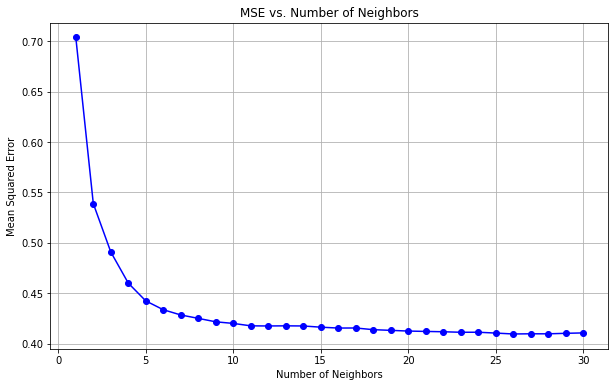

In [38]:
%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

mse_scores = []

for n_neighbors in range(1, 31):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform', metric='euclidean')
    knn_regressor = make_pipeline(StandardScaler(), knn)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), mse_scores, marker='o', linestyle='-', color='b')
plt.title('MSE vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


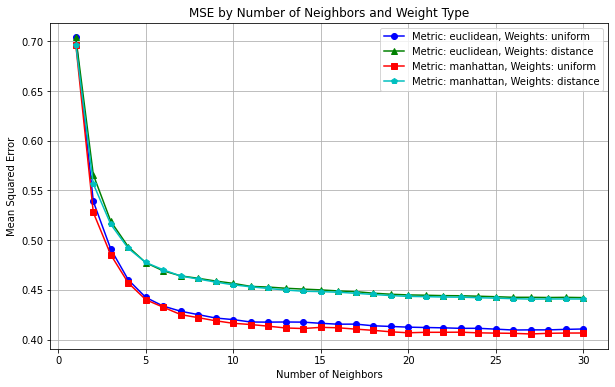

In [39]:
weights_options = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan']
colors = ['b', 'g', 'r', 'c']
markers = ['o', '^', 's', 'p']

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    for j, weight in enumerate(weights_options):
        mse_scores = []
        for n_neighbors in range(1, 31):
            knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weight, metric=metric)
            knn_regressor = make_pipeline(StandardScaler(), knn)
            knn_regressor.fit(X_train, y_train)
            y_pred = knn_regressor.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            mse_scores.append(mse)

        plt.plot(range(1, 31), mse_scores, color=colors[i*2 + j], marker=markers[i*2 + j],
                 linestyle='-', label=f'Metric: {metric}, Weights: {weight}')

plt.title('MSE by Number of Neighbors and Weight Type')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


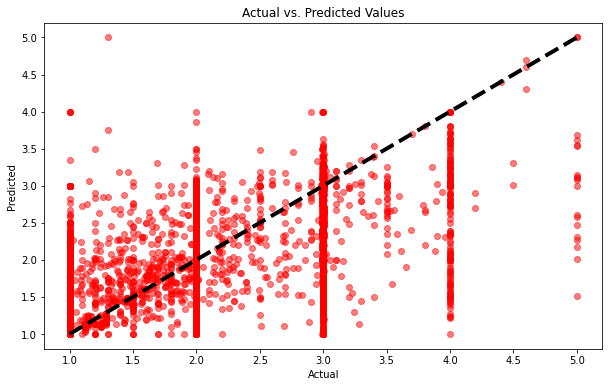

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()
